In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
diamonds = pd.read_csv(r'C:\Users\Mtime\OneDrive\Bureau\diamonds_clean.csv')
diamonds = diamonds.drop(columns = ["Unnamed: 0"])
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,new_clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2,1
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3,1


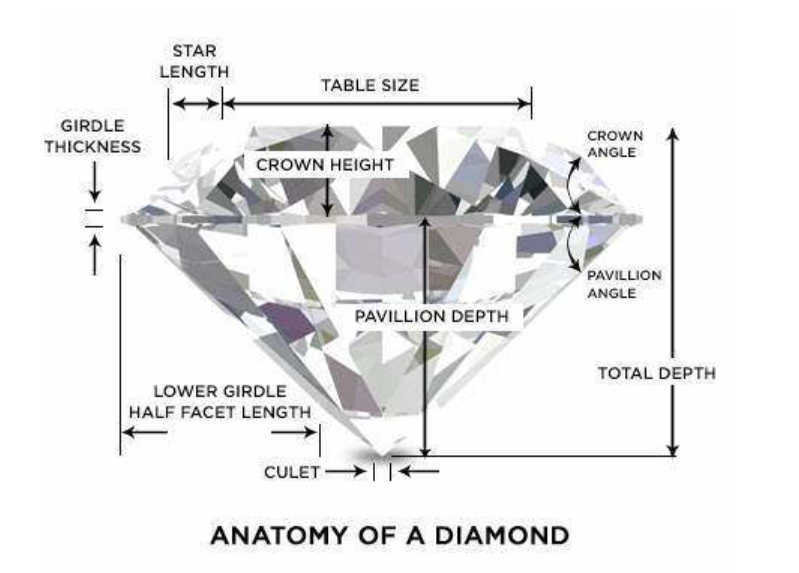

1.1. plot all the columns

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

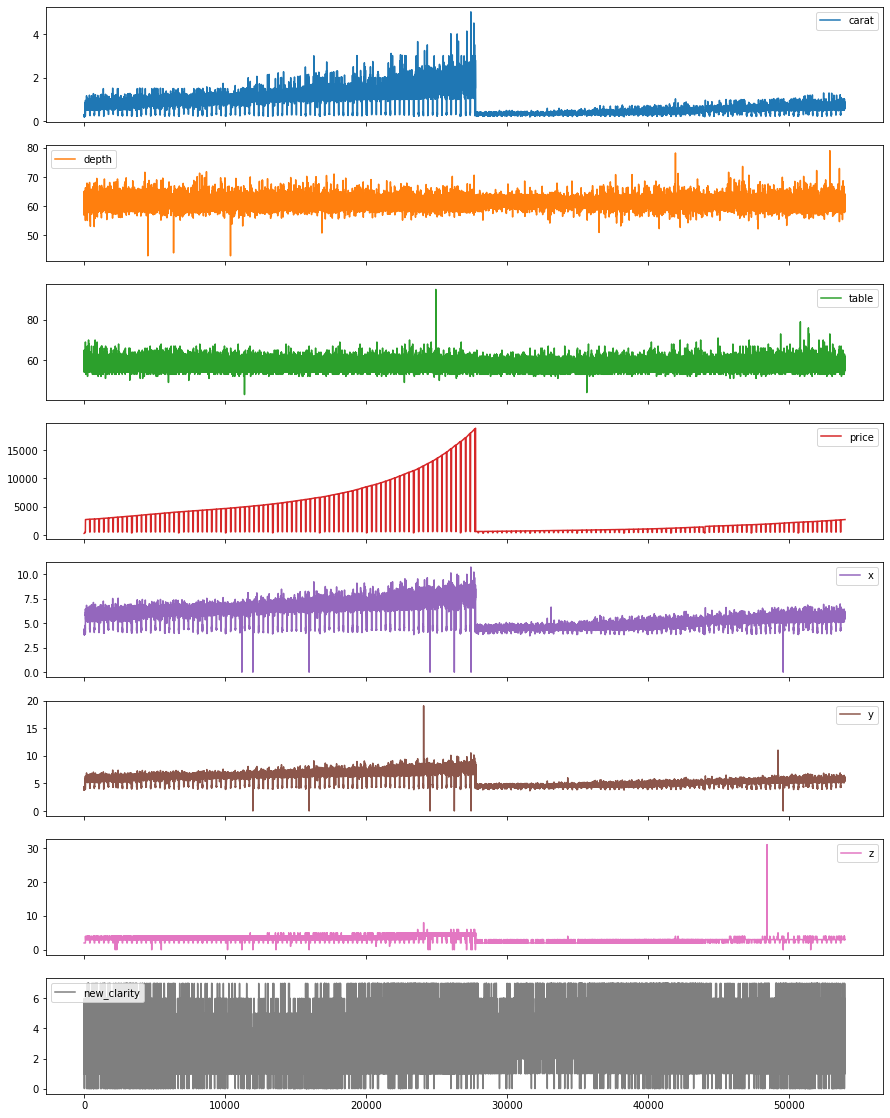

In [34]:
diamonds.plot(subplots=True, figsize=(15, 20))

1.2. the scatter plot of price with carat

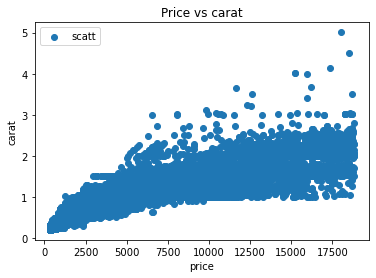

In [4]:
plt.scatter(diamonds['price'], diamonds['carat'], label = 'scatt')
plt.xlabel('price')
plt.ylabel('carat')
plt.title("Price vs carat")
plt.legend()

1.3. Boxplot of all the coloumns 

No handles with labels found to put in legend.


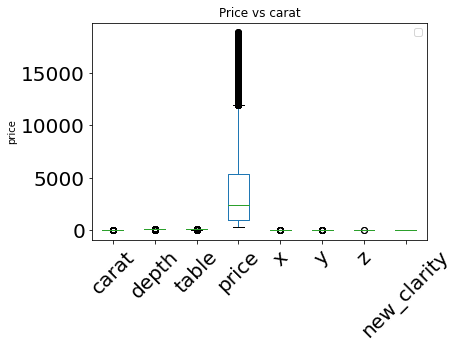

In [8]:
boxplot = diamonds.boxplot(grid=False, rot=45, fontsize=20)
plt.ylabel('price')
plt.title("Price vs carat")
plt.legend()

1.4. hexbin plot of the price with depth

No handles with labels found to put in legend.


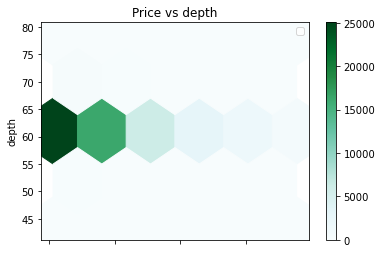

In [5]:

diamonds.plot.hexbin(x = 'price', y = 'depth', gridsize=5)
plt.xlabel('price')
plt.ylabel('depth')
plt.title("Price vs depth")
plt.legend()


plt.show()

1.5. the violin plots for carat, table and depth

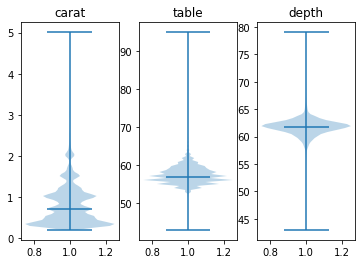

In [31]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
# Plot violin plot on axes 1
ax1.violinplot(diamonds.carat, showmedians=True)
ax1.set_title('carat')
# Plot violin plot on axes 2
ax2.violinplot(diamonds.table, showmedians=True)
ax2.set_title('table')
# Plot violin plot on axes 3
ax3.violinplot(diamonds.depth, showmedians=True)
ax3.set_title('depth')

plt.show()

1.6. area distrubition

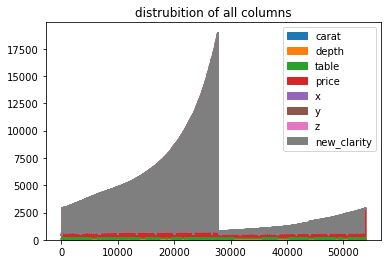

In [9]:
diamonds.plot.area()
plt.title("distrubition of all columns")
plt.legend()

plt.show()

1.7. Groupby the mean of price plot 

In [ ]:
diamonds.groupby('price').carat.value_counts().unstack().plot.bar(width=1, stacked=True)

In [41]:
Price_agg = diamonds.groupby('price').mean()
Price_agg

,carat,depth,table,x,y,z,new_clarity
price,,,,,,,
326,0.22,60.65,58.0,3.920,3.91,2.0,1.5
327,0.23,56.90,65.0,4.050,4.07,2.0,4.0
334,0.29,62.40,58.0,4.200,4.23,2.0,3.0
335,0.31,63.30,58.0,4.340,4.35,2.0,1.0
336,0.24,62.55,57.0,3.945,3.97,2.0,5.5
...,...,...,...,...,...,...,...
18803,2.00,62.80,57.0,7.950,8.00,5.0,2.0
18804,2.07,62.50,55.0,8.200,8.13,5.0,1.0
18806,1.51,61.70,55.0,7.370,7.41,4.0,7.0


In [42]:
errors = Price_agg.std()

C:\Users\Mtime\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:xlabel='price'>

<Figure size 1440x1440 with 0 Axes>

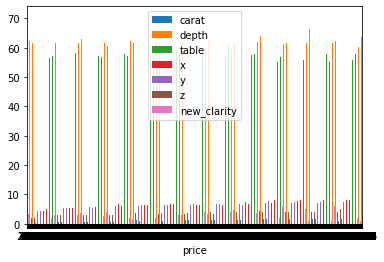

In [43]:
fig = plt.figure(figsize = (20, 20))
fig, ax = plt.subplots()
Price_agg.plot.bar(yerr=errors, ax=ax, capsize=25, rot=0)

1.8. 3D plot 

<Figure size 432x288 with 0 Axes>

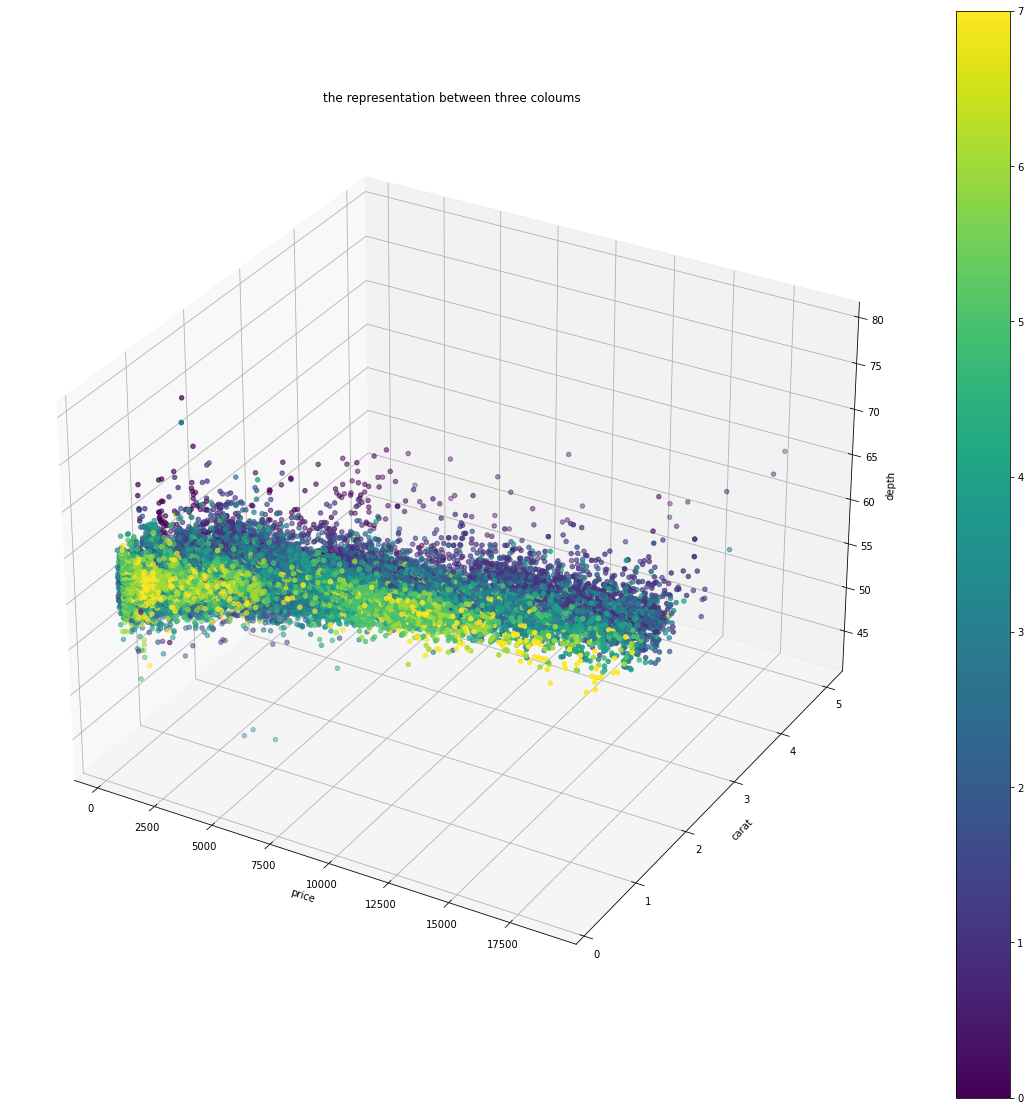

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(111, projection='3d')
pnt3d = ax.scatter3D(diamonds['price'], diamonds['carat'], diamonds['depth'], c =diamonds['new_clarity'] )
cbar=plt.colorbar(pnt3d)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.set_xlabel('price')
ax.set_ylabel('carat')
ax.set_zlabel('depth')
ax.set_title("the representation between three coloums ")
plt.show()

1.9. Pie chart

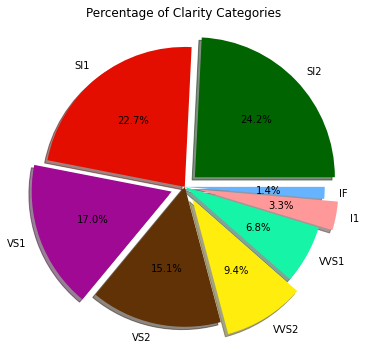

In [32]:
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#FF9999','#66B3FF']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()